In [17]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# 1 Import data 

In [18]:
# import interaction partner gene id's
lncrna = pd.read_csv('/home/maggy/LncRNA/10_lncRNA_classification/deg_lncrna_interaction_partners.txt', sep='\t')
partner = pd.read_csv('/home/maggy/LncRNA/10_lncRNA_classification/deg_lncrna_interaction_partners.txt', sep='\t')

# import expression data transcript and gene level 
gexpression = pd.read_csv('/home/maggy/LncRNA/8_create_count_matrix/deg_geneid/gene_matrix_count.csv', sep=',', index_col=0)
texpression = pd.read_csv('/home/maggy/LncRNA/8_create_count_matrix/lncrna_transcriptid/gene_matrix_count.csv', sep=',', index_col=0)

# 2 Filter expression data to only contain DElncRNA interaction partner transcript id's

In [19]:
# add M before STRG in the column names 
lncrna['lncRNA_transcript'] = lncrna['lncRNA_transcript'].str.replace('STRG', 'MSTRG')

# get the transcript expression for the lncrna (transcript level)
lncrnaexpression = texpression[texpression.index.isin(lncrna['lncRNA_transcript'])]
# get the gene expression for the interaction partners (gene level)
partnerexpression = gexpression[gexpression.index.isin(partner['partnerRNA_gene'])]

# filter the rows that have as a sum less tan 50 counts 
lncrnaexpression = lncrnaexpression[lncrnaexpression.sum(axis=1) > 50]
partnerexpression = partnerexpression[(partnerexpression.sum(axis=1) > 50)]

# Specify the desired column order
#column_order = ['N14', 'N15', 'N16', 'N17', 'N18', 'N21', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13']
# Reorder the dataframe columns
#lncrnaexpression = lncrnaexpression.reindex(columns=column_order)
#partnerexpression = partnerexpression.reindex(columns=column_order)

In [20]:
partnerexpression

,R12,A5,A4,A6,N16,N15,R9,A1,N14,R8,A3,A2,R13,R10,R11,N18,N21,N17
Geneid,,,,,,,,,,,,,,,,,,
ccar_ua01-g51,2,5,15,5,16,9,6,7,15,0,5,0,7,6,2,25,14,6
ccar_ua01-g66,29,25,15,13,62,81,23,18,67,27,16,15,30,34,31,85,64,69
ccar_ua01-g94,12,26,16,23,11,14,7,11,13,18,20,18,13,28,6,14,9,13
ccar_ua01-g95,19,23,17,27,42,33,28,17,31,26,20,23,31,33,18,62,34,34
ccar_ua01-g112,6,4,9,3,6,5,9,8,16,10,8,4,9,5,11,9,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ccar_ua17-g16651,48,72,65,61,85,74,44,78,58,55,66,76,52,70,34,87,61,56
ccar_ua18-g16703,3,3,1,7,4,4,4,1,3,5,3,4,4,8,4,2,1,2
ccar_ua18-g16721,57,51,70,72,44,21,74,40,34,69,45,62,73,92,63,23,41,36


/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(729.5149825021871, 0.5, '')

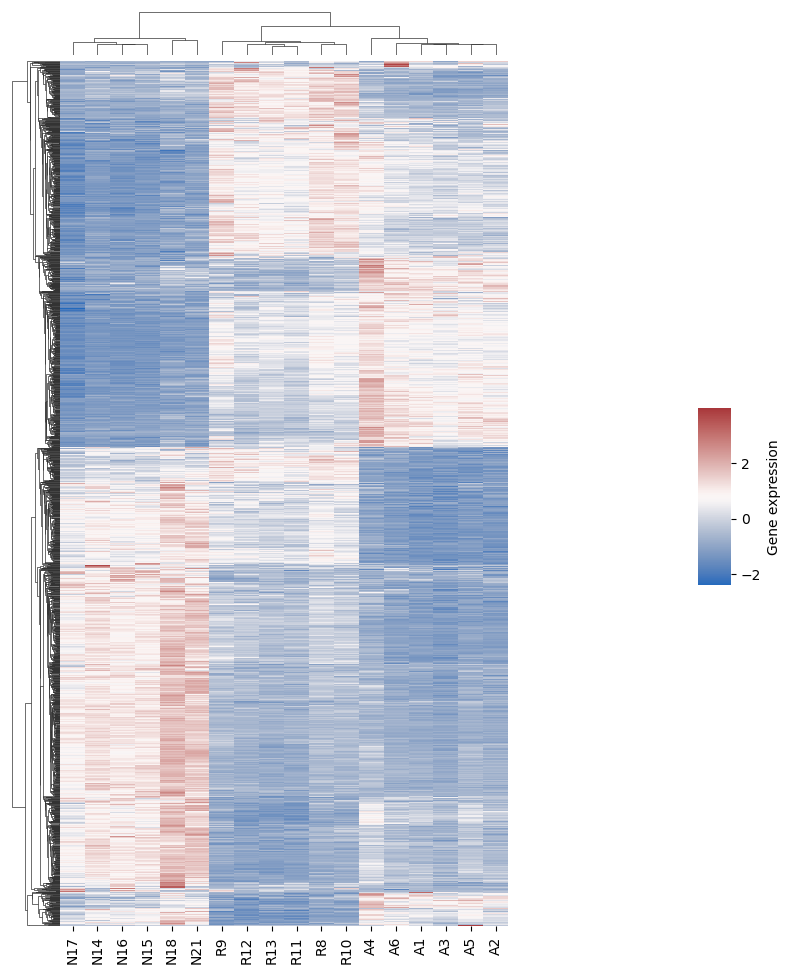

In [21]:
g = sns.clustermap(lncrnaexpression, cmap='vlag', figsize=(17/2.54, 25/2.54), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, fmt=".1f", col_cluster=True, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05))

g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_ylabel('')

Text(1045.1527777777778, 0.5, '')

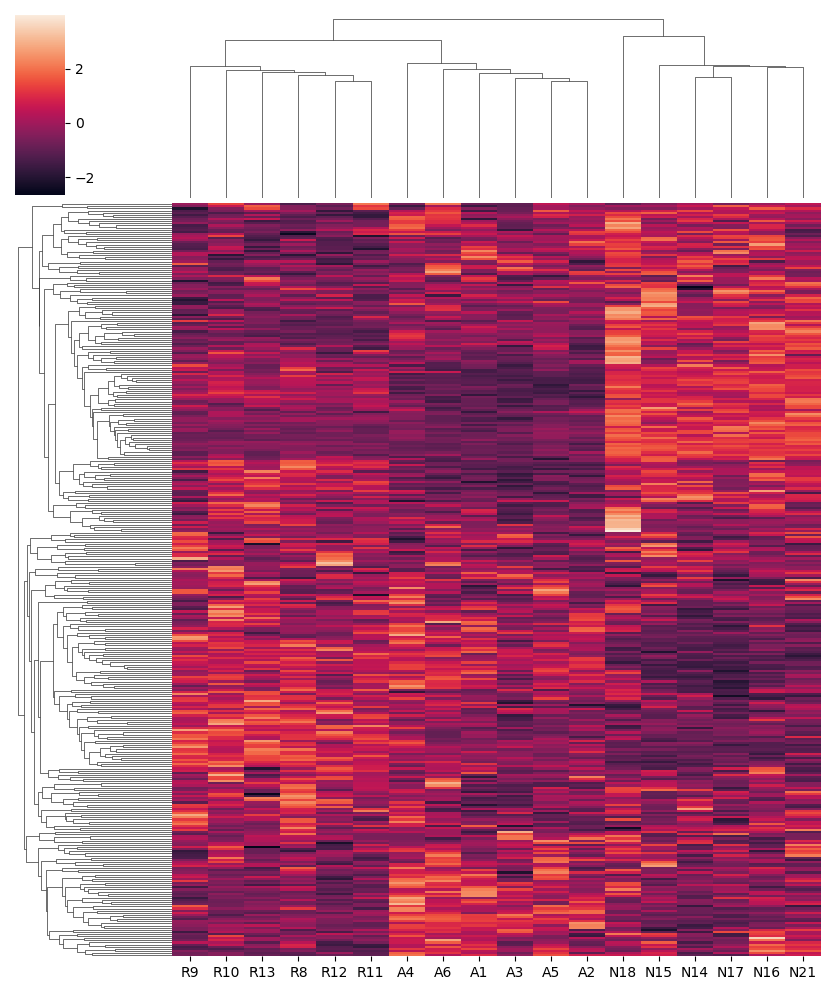

In [22]:
g = sns.clustermap(partnerexpression, dendrogram_ratio=(.2, .2), z_score=0)
# Remove transcript labels on the right side
g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_ylabel('')

In [ ]:
sns.clustermap(expressionlnc, 
                cmap='vlag', figsize=(17/2.54, 25/2.54), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, xticklabels=True, yticklabels=True, 
                annot=True, fmt=".1f", col_cluster=True, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05), row_colors=colors)

In [23]:
# import the deg data to know which comparison the DElncRNA interaction partner transcript id belongs to
deg_na = pd.read_csv('/home/maggy/LncRNA/9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/Normoxia to Anoxia_lncrna.csv', sep=',')
deg_nr = pd.read_csv('/home/maggy/LncRNA/9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/Normoxia to Reoxygenation_lncrna.csv', sep=',')
deg_ar = pd.read_csv('/home/maggy/LncRNA/9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/Anoxia to Reoxygenation_lncrna.csv', sep=',')

In [25]:
    # create color code: 
colors={}
# all in NvsA 
colors.update({g: '#DE8F05' for g in deg_na['transcript_id']})
# all in NvsR minus intersection with NvsA
colors.update({g: '#029E73' for g in set(deg_nr['transcript_id']) - (set(deg_nr['transcript_id']).intersection(deg_na['transcript_id']))})
# all in AvsR minus intersection with NvsA
colors.update({g: '#0173B2' for g in set(deg_ar['transcript_id']) - (set(deg_ar['transcript_id']).intersection(deg_na['transcript_id']))})

colors = pd.Series(colors, name='condition')


In [26]:
colors

strg.51.1       #DE8F05
strg.108.1      #DE8F05
strg.133.1      #DE8F05
strg.157.1      #DE8F05
strg.214.1      #DE8F05
                 ...   
strg.3245.1     #0173B2
strg.26588.1    #0173B2
strg.13442.1    #0173B2
strg.15443.1    #0173B2
strg.28681.1    #0173B2
Name: condition, Length: 2208, dtype: object

In [27]:
lncna=[]
lncnr=[]
lncar=[]

# split the expressionlnc df into three df 
expressionNA = expressionlnc[expressionlnc.index.isin(deg_na['transcript_id'])]
expressionNR = expressionlnc[expressionlnc.index.isin(deg_nr['transcript_id'])]
expressionAR = expressionlnc[expressionlnc.index.isin(deg_ar['transcript_id'])]

In [30]:
# Setup the sample sex information
sex_info = {
'N14': 'F',
 'N15': 'M',
 'N16': 'F',
 'N17': 'M',
 'N18': 'F',
 'N21': 'M',
 'A1': 'M',
 'A2': 'M',
 'A3': 'M',
 'A4':'F',
 'A5':'M',
 'A6':'F',
 'R8':'M',
 'R9': 'F',
 'R10': 'M',
 'R11':'M', 
 'R12': 'M',
 'R13': 'M'
}

# Define colors
sex_colors = {
    'M': 'black',   # Color for males
    'F': sns.color_palette("hls", 8)[0]    # Color for females
}

# 3 Heatmap

/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_3055/2741137943.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
/tmp/ipykernel_3055/2741137943.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


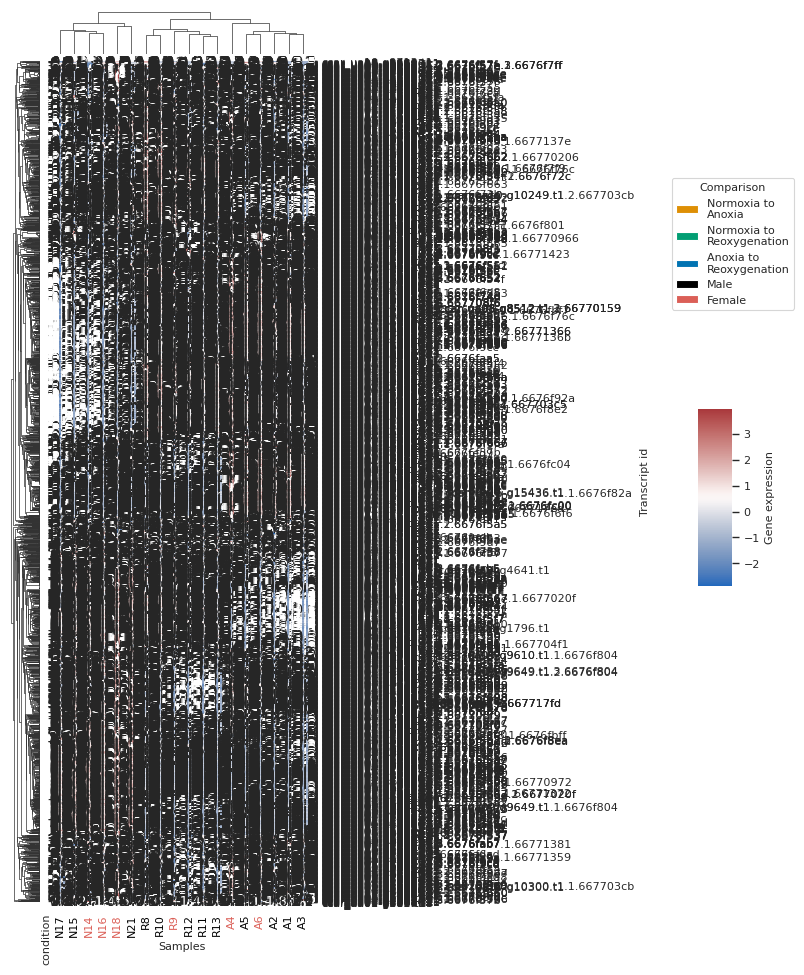

In [32]:
from matplotlib.patches import Patch

sns.set_theme(style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})
g = sns.clustermap(expressionlnc, 
                cmap='vlag', figsize=(17/2.54, 25/2.54), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, xticklabels=True, yticklabels=True, 
                annot=True, fmt=".1f", col_cluster=True, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05), row_colors=colors)
#g.figure.suptitle('DMR expression')
g.ax_heatmap.set_xlabel('Samples')
# Customization of xtick labels based on sex_info with colors
xtick_labels = [label.get_text() for label in g.ax_heatmap.get_xticklabels()]
# Apply color to the xtick labels based on sex information
for label in g.ax_heatmap.get_xticklabels():
    sample_name = label.get_text()
    sex = sex_info.get(sample_name, '')
    label.set_color(sex_colors.get(sex, 'black'))
# Legend for the heatmap including sex information
legend_elements = [
    Patch(facecolor='#DE8F05', label='Normoxia to\nAnoxia'),
    Patch(facecolor='#029E73', label='Normoxia to\nReoxygenation'),
    Patch(facecolor='#0173B2', label='Anoxia to\nReoxygenation'),
    Patch(facecolor='black', label='Male'),
    Patch(facecolor=sns.color_palette("hls", 8)[0], label='Female')
]

y_ticks = [label.get_text() for label in g.ax_heatmap.get_yticklabels()]
g.ax_heatmap.set_ylabel('Transcript id')
# Adding the legend
g.ax_cbar.legend(loc='upper left', bbox_to_anchor=(-0.8, 2.3), title='Comparison', handles=legend_elements, borderaxespad=0.)
# Adjust layout
plt.tight_layout()



In [ ]:
sns.clustermap(expressionlnc, 
                cmap='vlag', figsize=(17/2.54, 25/2.54), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, xticklabels=True, yticklabels=True, 
                annot=True, fmt=".1f", col_cluster=True, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05), row_colors=colors)